In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, classification_report


In [2]:

data=pd.read_csv('Churn Modeling.csv')
data=data.drop(columns=["RowNumber",'CustomerId', 'Surname'])
data.head()



,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# Check for missing values in the training dataset
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100
missing_data_info = pd.DataFrame({'Missing_Values': missing_values, 'Missing_Percentage': missing_percentage})
missing_data_info = missing_data_info.sort_values(by='Missing_Percentage', ascending=False)
print("Columns with the highest percentage of missing values:")
print(missing_data_info.head())


Columns with the highest percentage of missing values:
             Missing_Values  Missing_Percentage
CreditScore               0                 0.0
Geography                 0                 0.0
Gender                    0                 0.0
Age                       0                 0.0
Tenure                    0                 0.0


Descriptive Statistics for Train Dataset 
         CreditScore           Age        Tenure        Balance  NumOfProducts  \
count  10000.000000  10000.000000  10000.000000   10000.000000   10000.000000   
mean     650.528800     38.921800      5.012800   76485.889288       1.530200   
std       96.653299     10.487806      2.892174   62397.405202       0.581654   
min      350.000000     18.000000      0.000000       0.000000       1.000000   
25%      584.000000     32.000000      3.000000       0.000000       1.000000   
50%      652.000000     37.000000      5.000000   97198.540000       1.000000   
75%      718.000000     44.000000      7.000000  127644.240000       2.000000   
max      850.000000     92.000000     10.000000  250898.090000       4.000000   

         HasCrCard  IsActiveMember  EstimatedSalary        Exited  
count  10000.00000    10000.000000     10000.000000  10000.000000  
mean       0.70550        0.515100    100090.239881      0.203700  
std        0.45584     

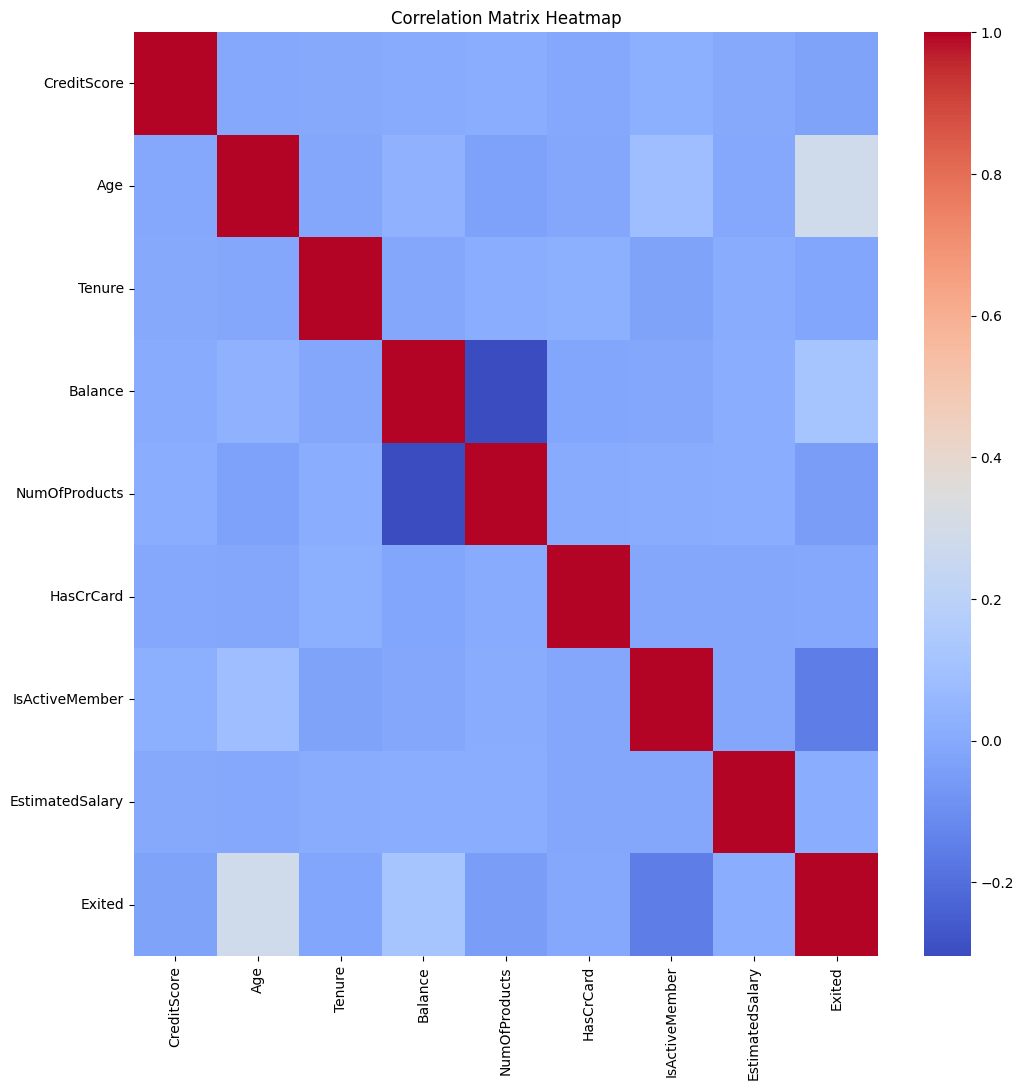

no highly colleracted features
Exited
0    7963
1    2037
Name: count, dtype: int64


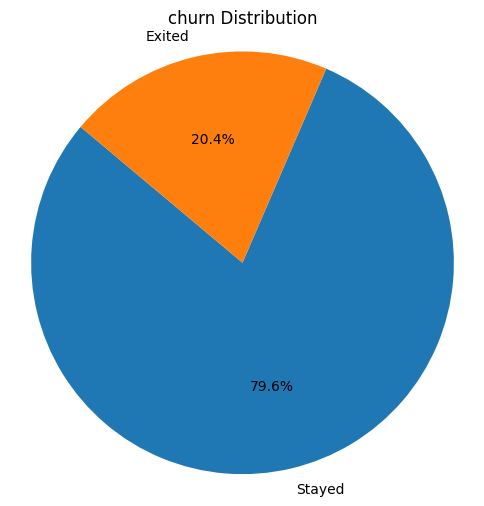

c:\Users\Abdelrahman Abdullah\python\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


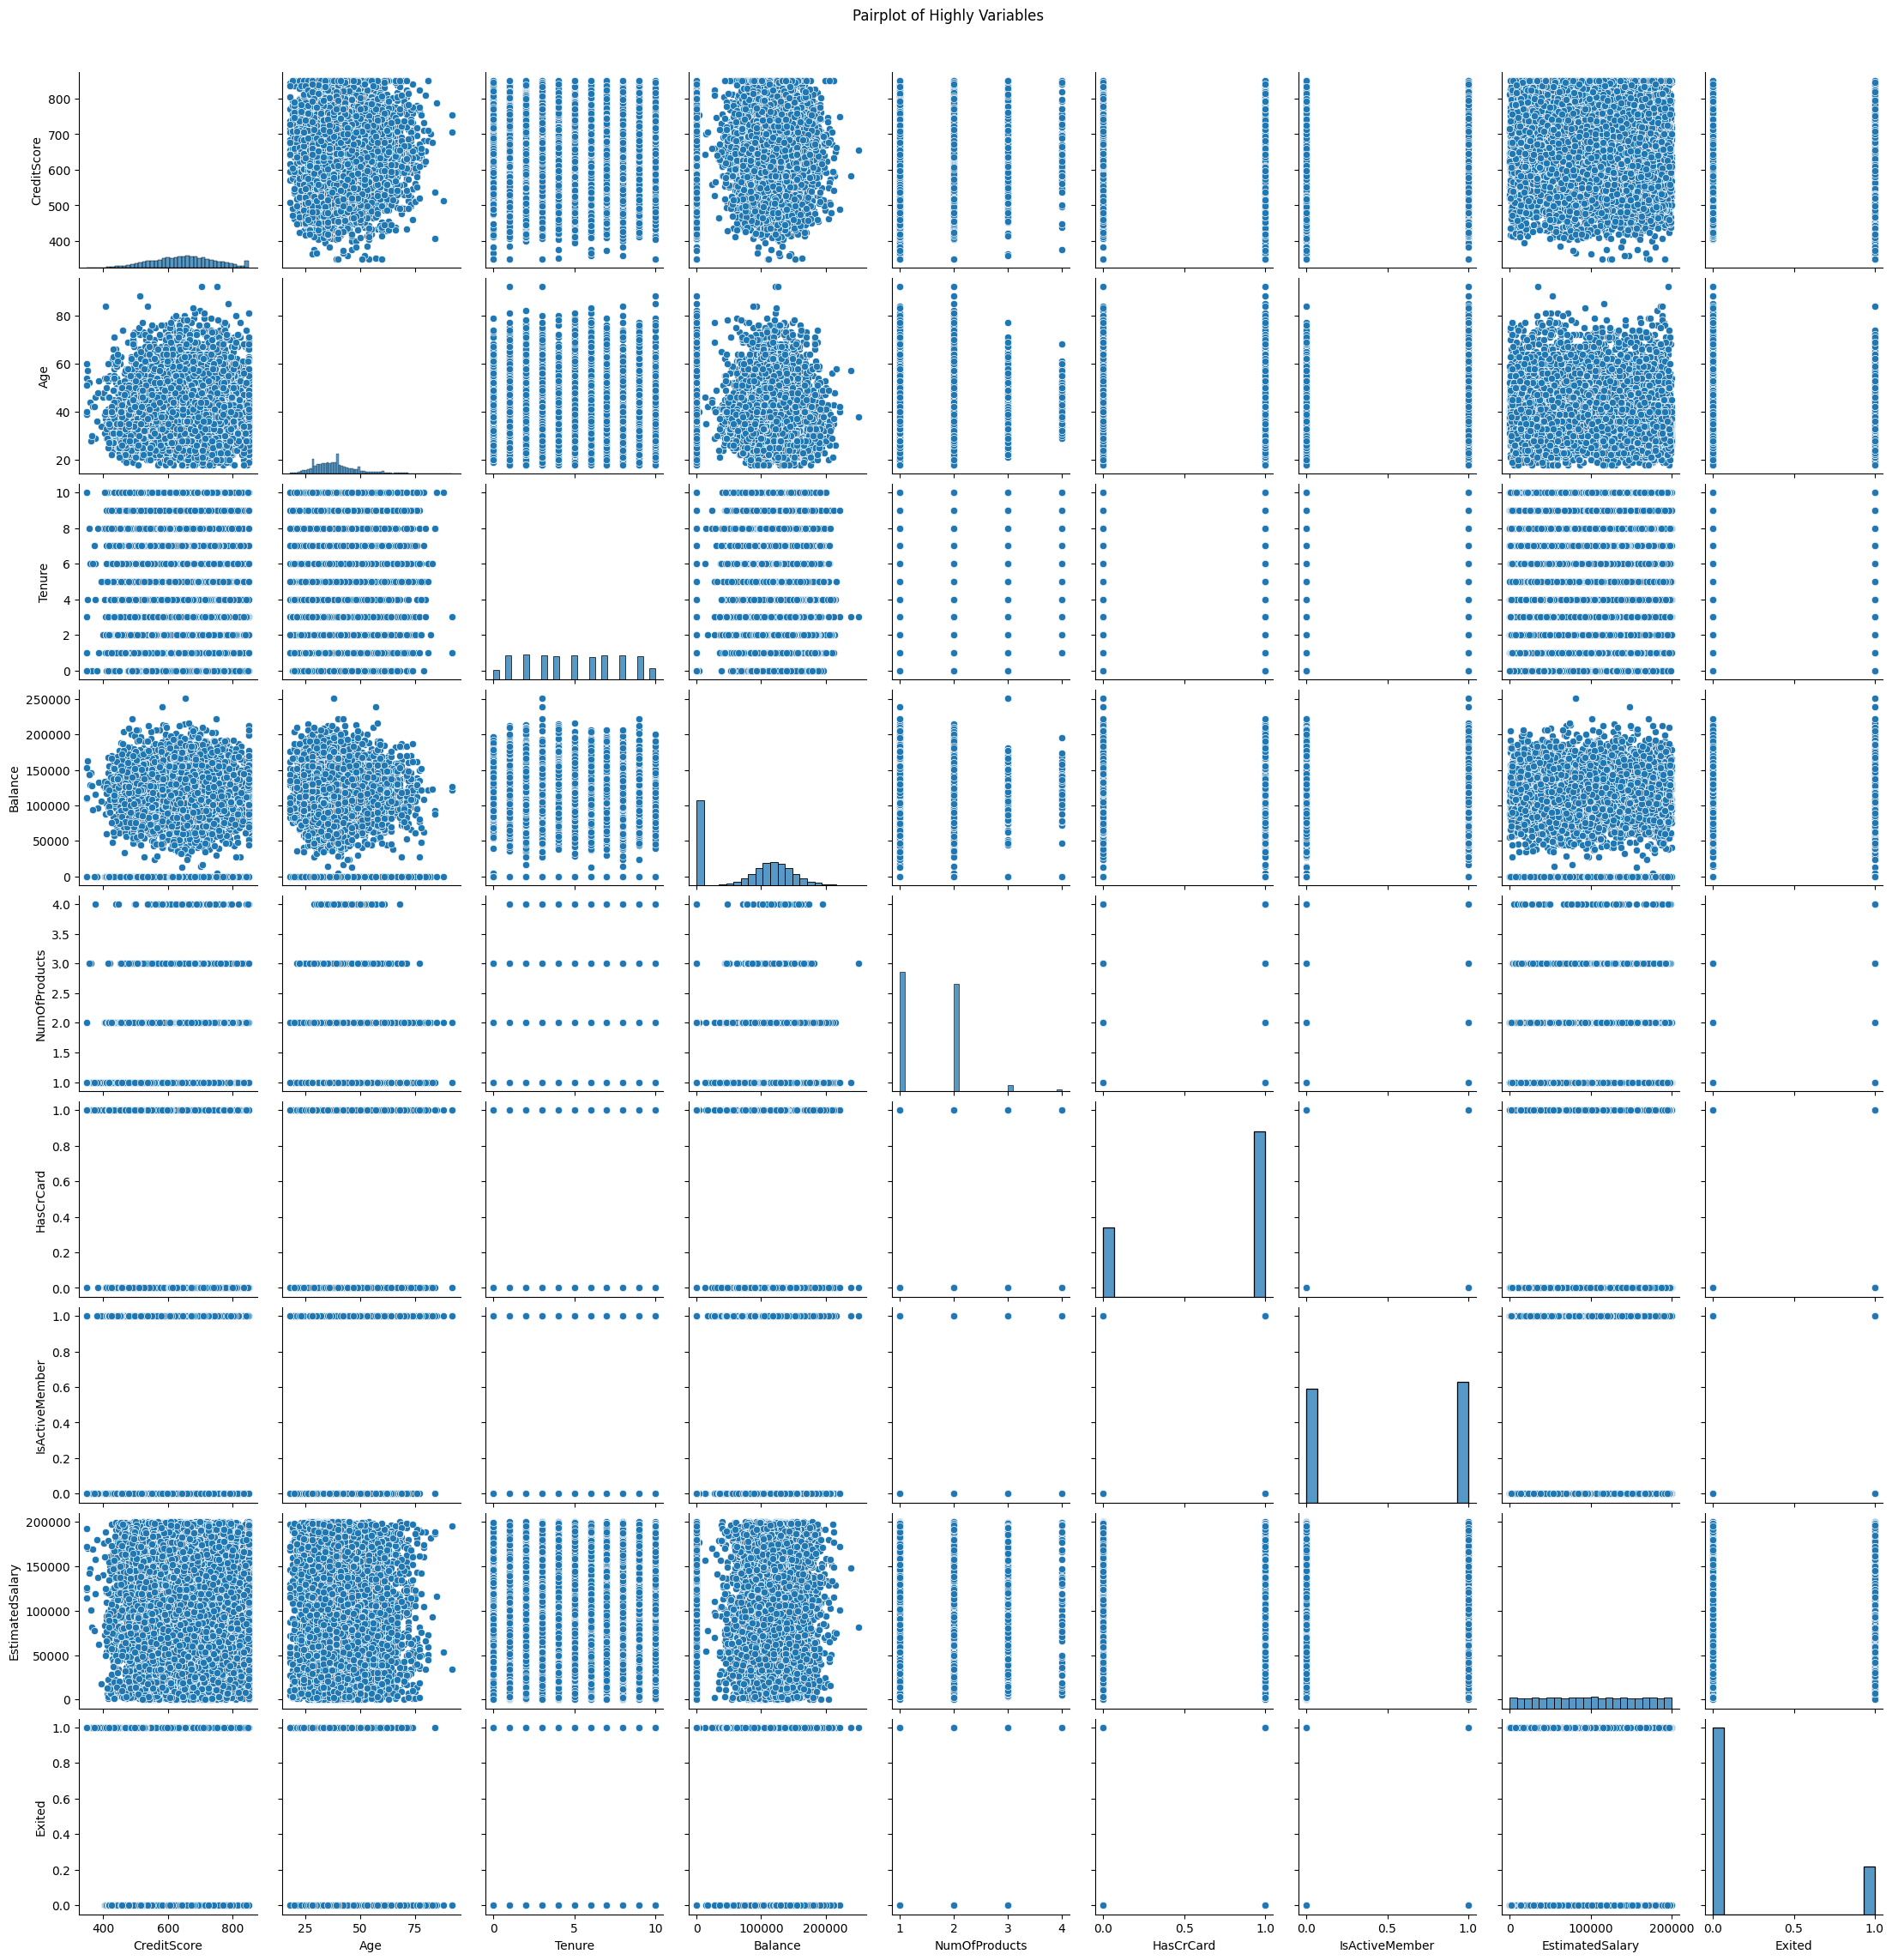

In [4]:
# Perform statistical analysis and visualizations
# Descriptive statistics for the training dataset
categorical_cols = data.select_dtypes(exclude=[np.number]).columns
numerical_cols = data.select_dtypes(include=[np.number]).columns
print('Descriptive Statistics for Train Dataset','\n', data.describe())
print('\n','Median=', data[numerical_cols].median(), '\n', 'Mode=', data.mode().iloc[0], '\n')
correlation_matrix = data.select_dtypes(include=[np.number]).corr()
correlation_with_exited = correlation_matrix['Exited'].sort_values(ascending=False)
print(correlation_with_exited)
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix,fmt='.2f',cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()
highly_correlated_features = correlation_with_exited[abs(correlation_with_exited) > 0.5].index
if(highly_correlated_features=="Exited"):
    print("no highly colleracted features")
else:
    print("Features highly correlated with 'exited':")
    print(highly_correlated_features)
churn_counts = data['Exited'].value_counts()
print(churn_counts)
labels=["Stayed", "Exited"]
# Plotting a pie chart
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('churn Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
sns.pairplot(data)
plt.suptitle('Pairplot of Highly Variables', y=1.02)
plt.show()


In [5]:
categorical_columns = data.select_dtypes(exclude=[np.number]).columns
numerical_columns = data.select_dtypes(include=[np.number]).columns
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_data = encoder.fit_transform(data[categorical_columns])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))
data_encoded = pd.concat([data[numerical_columns], encoded_df], axis=1)
print( data_encoded)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_encoded)
scaled_df = pd.DataFrame(scaled_data, columns=data_encoded.columns)
print(scaled_df)

      CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619   42       2       0.00              1          1   
1             608   41       1   83807.86              1          0   
2             502   42       8  159660.80              3          1   
3             699   39       1       0.00              2          0   
4             850   43       2  125510.82              1          1   
...           ...  ...     ...        ...            ...        ...   
9995          771   39       5       0.00              2          1   
9996          516   35      10   57369.61              1          1   
9997          709   36       7       0.00              1          0   
9998          772   42       3   75075.31              2          1   
9999          792   28       4  130142.79              1          1   

      IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
0                  1        101348.88       1                0.0   
1          

c:\Users\Abdelrahman Abdullah\python\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [6]:
x = scaled_df.drop('Exited', axis=1)
y = scaled_df['Exited']

# Split data into train and test sets for model evaluation
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4,random_state=42)

In [7]:

# Define different optimizers to help tune parameters
sgd = SGD(learning_rate=0.1)
adam = Adam(learning_rate=0.1)
# Define the EarlyStopping callback to prevent overfitting.
early_stopping_monitor = EarlyStopping(min_delta=0.001, patience=10, monitor='val_loss', restore_best_weights=True)

In [8]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.summary()
# Compile the model
model.compile(optimizer=sgd, loss='mean_squared_error',metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=100,callbacks=[early_stopping_monitor], validation_split=0.1)

c:\Users\Abdelrahman Abdullah\python\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,857 (38.50 KB)

 Trainable params: 9,857 (38.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7870 - loss: 0.1733 - val_accuracy: 0.7900 - val_loss: 0.1562
Epoch 2/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7862 - loss: 0.1590 - val_accuracy: 0.7900 - val_loss: 0.1508
Epoch 3/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7946 - loss: 0.1507 - val_accuracy: 0.7933 - val_loss: 0.1478
Epoch 4/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7980 - loss: 0.1460 - val_accuracy: 0.8033 - val_loss: 0.1449
Epoch 5/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8055 - loss: 0.1436 - val_accuracy: 0.8100 - val_loss: 0.1424
Epoch 6/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8020 - loss: 0.1455 - val_accuracy: 0.8133 - val_loss: 0.1403
Epoch 7/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8119 - loss: 0.1386 - val_accuracy: 0.8183 - val_loss: 0.1385
Epoch 8/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8044 - loss: 0.1436 - val_accu

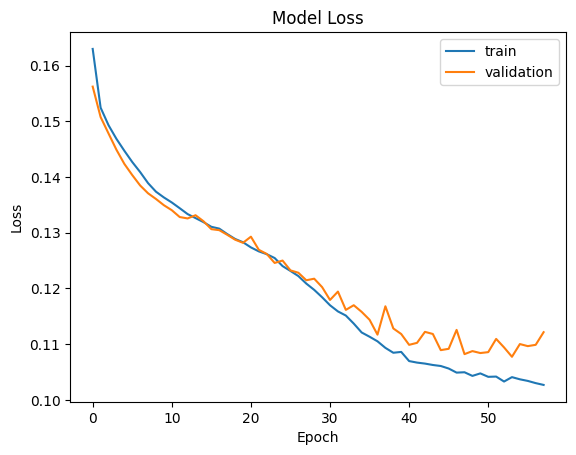

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

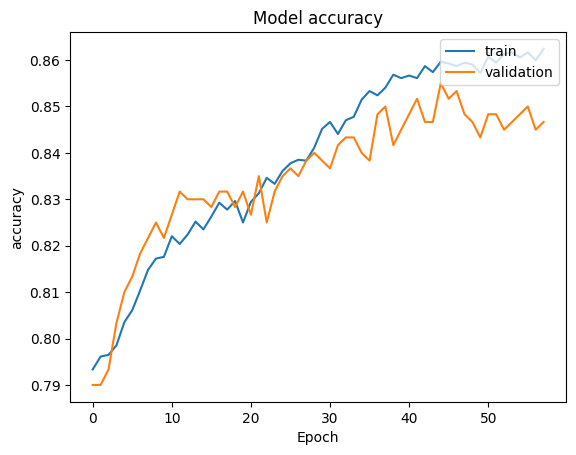

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8577 - loss: 0.1052
Test Accuracy: 0.8569999933242798
mean squared error: 0.10635158637838474


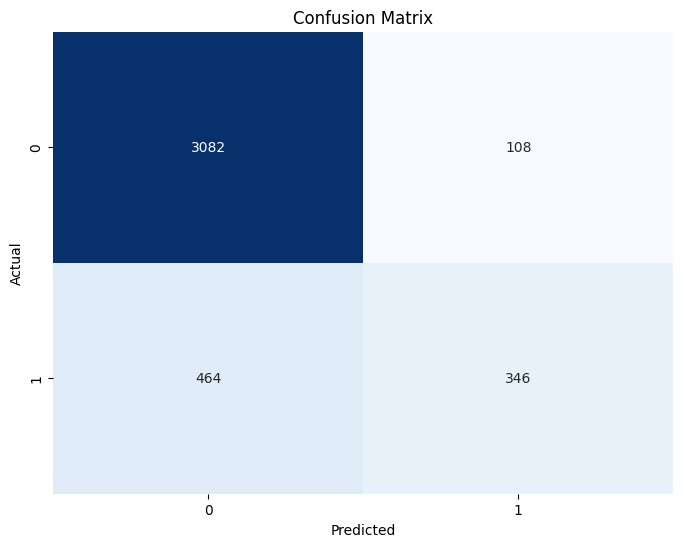

              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92      3190
         1.0       0.76      0.43      0.55       810

    accuracy                           0.86      4000
   macro avg       0.82      0.70      0.73      4000
weighted avg       0.85      0.86      0.84      4000



In [11]:
y_pred = model.predict(x_test)
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", accuracy)
mse=mean_squared_error(y_test, y_pred)
print("mean squared error:",mse)
y_pred=np.round(y_pred)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))